In [2]:
%matplotlib inline

# LAB 3 - Coding mussel physiology model (SHELL-E) from the equations in paper

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

--------------------------------------------------

**Renedered link:** http://nbviewer.jupyter.org/urls/bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week3/LAB%203%20Coding%20mussel%20physiology%20model%20(SHELL-E)%20from%20the%20equations%20in%20paper.ipynb

--------------------------------------------------

In this lab we will take the equations from the paper <a href="http://www.cmep.ca/jcullen/publications/2014/Ibarra_etal_2014_Ecol_Modelling_with_Supplementary.pdf" target="__blank">Ibarra_etal_2014_Ecol_Modelling_with_Supplementary.pdf</a> and turned them into Python code. Note that here we will only code the "physiology" sub-model, however the full model also contains sub-models of hydrodynamics, sediments, planktonic ecosystem, and mussel population dynamics. 

<img src="./diagram.png" width="300px">

_**Reference:** Ibarra DA, Fennel K, Cullen JJ (2014) Coupling 3-D Eulerian bio-physics (ROMS) with individual-based shellfish ecophysiology (SHELL-E): A hybrid model for carrying capacity and environmental impacts of bivalve aquaculture. Ecological Modelling. 273:63-78._

------------------


## The "skeleton"

Once you code a model and got it working, you really want to "leave it alone". You want to be able to run your model without having to get into your code and change anything, because this may result in you making a mistake and breaking the model. Therefore you want to write your code inside functions that you can then call from a different file (i.e. leaving your source code untouched and safe). Here, we'll split our code into 3 functions, `load_defaults`, `run` and `plot`, so that later you can execute the different parts of your code independently (e.g. you can run your model with out making plots).

The code below is the "skeleton" of our code. It consists on 3 "empty" functions plus an `if __name__ == "__main__":` statement that will help us to execute our functions during development by simply running the file.

In **Spyder**, open a new empty file and save it as <span class='file'>model_SHELLE.py</span>

Copy-paste the following in <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

In [39]:
def load_defaults():
    return
    
def run():
    return

def plot():
    return

if __name__ == "__main__":
    print('Running my_module.py')
    print('--------------------')
    print('--------------------')

Running my_module.py
--------------------
--------------------


Note that the contents of the `if __name__ == "__main__":` will only be executed if you run the <span class='file'>model_SHELLE.py</span> file, and will not be executed if you import the module and use the functions from another file.

Now, lets ad some "flesh " to the "skeleton"... 

-----------------------

## THE TEMPLATE

The code below has the "backbone" of a empty model. It contains the same 3 functions described above, but also contains elements that are used in all models. Therefore, **if later you need to code a physiology model from a paper, you can start from this template**. The contents of the template are explained below. 

Replace the contents of <span class='file'>model_SHELLE.py</span> with the template code below and click <span class='run'></span>

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


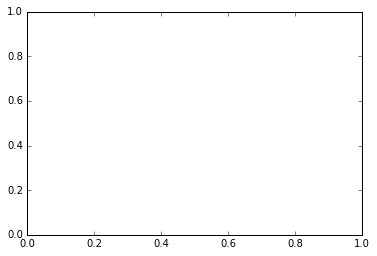

--------------------


In [40]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    
    # Initial conditions
    InitCond = {}
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    
    # Initializing with initial conditions
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        a = 0 #DUMMY LINE
        # Update and step ------------------------------
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)   
    plt.show()                      
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Lets explain the template...

The template includes all sections that you used in the previous lab (setup the framework, input parameters and initial conditions, create zero arrays, main model loop, plotting, etc.). When you decide to code a model, the template should assist you in knowing where to insert the different parts of the model.

When we ran <span class='file'>model_SHELLE.py</span>, we "loaded" the 3 functions ( `load_defaults`,`run` and `plot` ) and then executed the contents of `if __name__ == "__main__":`.

#### The 3 lines within the `if __name__ == "__main__":` statement:

In the first line `days, dt, par, InitCond = load_defaults()`, we created the variables `days`, `dt`, `par` and `InitCond` and assigned default values to these variables. Note that the default values are specified in the `load_defaults` function. Also note that `par` and `InitCond` are empty (for now). These are dictionaries where we will pack our parameters and initial-conditions (respectively) once we start coding our model.

In the second line `output = run(days, dt, par, InitCond)`, we executed the `run` function, which runs the model using `days`, `dt`, `par` and `InitCond` as inputs. The model output is delivered inside the `output` variable. For now there no model inside the `run` function (just an empty backbone), and the `output` dictionary is also empty.

Finally, in the third line within `if __name__ == "__main__":` (i.e. `plot(output)` ), we will plot the contents of `output`. But for now we only make an empty plot.


-------------

## General approach to populate the template

Now it is time to start writing the model within the template. The model won't work until it is fully coded. However we do not want to code the entire model before running it for the first time, because it will be hard to fix any bugs and typos. It is important to write the model in little "chunks", making sure that the code runs at the end of each "chunk". 

Below are rough steps that we need to follow when writing a code "chunk":

1. Write one equation in the `#MAIN LOOP` within the `run` function. It is useful if we add in the comments the equation number so that readers can refer back to the paper if they need to.
1. If the equation calculates the value of a prognostic variable needing time-stepping, ad the time-stepping in the `# Update and step` section in the `run` function 
1. If the new equation calculates the value of a state variable that starts as a vector of zeros...
    * Create the vector of zeros in the `# Create arrays of zeros` section within the `run` function
    * Create an Initial Condition in the the `InitCond` dictionary within the `load_defaults` function
    * Initialize the vector of zeros in the `# Initializing with initial conditions` section within the `run` function.
1. Go over every term in the newly added equation...
    * If the term is a new parameter, add the new parameter to the `par` dictionary in the `load_defaults` function
    * If the term is new initial condition, add it to the `InitCond` dictionary in the `load_defaults` function
    * If the term is new variable that we have not calculated yet, add a "dummy variable" with a value of zero and a `# TO DO` comment so that you remember to come back later and change the value of the variable for the actual equation that estimates it (e.g. `A = 0 # TO DO` ). <span class="important"></span> You need to ad the dummy variable ABOVE your new equation.
1. If the new equation produces a values that you need to keep for your records, you need to pack them in the `output` dictionary at the end of the `run` function
1. If you want to plot the values generated by the newly added equation, ad the plotting code in the `plot` function

<span class="important"></span> Your code won't run until you finish ALL the steps for a give "chunk". 

You will need to follow the steps above for many (but likely not all) of the equations in your paper. Keep in mind the following:

* **Not every equation needs to be included**. Many modelling papers have coupled models that contain many sub-models (physics, sediments, plankton ecosystem, population dynamics, physiology, economics, air-see interaction, etc.). You may only need to code one sub-model. For example, in this lab you only need to code the equations describing the physiology of a mussel.
* **Start with the equations of the "prognostic" variables**. The "prognostic" variables are the ones that depend on the previous time-step to estimate the "future" time-step. Usually they refer to the biomass of the organism in question and they are the core of the model.  

-------------

## Adding prognostic variables: Biomass (Eq.2), Soma (Eq.11) and Gonad (Eq.12)

Here we'll break our own rules and do 3 equations at once. Because `Biomass = Soma + Gonad`, it will be easier to do the 3 equations simultaneously.


(2) $$ \frac{\partial B}{\partial t} = (A - R) - Spawning$$

(11) $$ \frac{\partial Soma}{\partial t} = (A - R) \cdot (1 -RE)$$

(12) $$ \frac{\partial Gonad}{\partial t} = [(A - R) \cdot RE]-Spawning$$


<span class="important"></span> The equations in the paper often have a `k` subscript. This is because, in the paper, the model is solved many times for many mussels. But in our case we are only modeling ONE mussel, so we'll simply ignore all the `k` subscripts. Also, in the paper the authors omitted the `t` subscripts to simplify the equations, however keep in mind that all terms DO vary over time.


We'll insert the different lines of code in a step-by-step process (you can see the finished "chunk" at the end of this section in the CHECKPOINT).

<span class="important"></span> Your code may return errors (i.e. it won't run) until you finish coding the entire "chunk". However, in practice, the errors are what tells you what needs to be coded next. That is, you write a step, then run the code... if you get error message (it should hint what is missing), add the missing part, run code... and a different error message may appear. Again, write the missing part, run code... and so on until the "chunk" is finished. 

First add the following equations in `# MAIN MODEL LOOP`. Note that we simply made them equal to zero. We'll do the right-side of the equation later.

    dBdt = 0 # TO DO Eq.1
    dSomadt = 0  # TO DO Eq.11
    dGonaddt = 0 # TO DO Eq.12
    
If you get the following error <span class='lineerror'>IndentationError: expected an indented block</span>...you did not indented your copy-pasted code properly. Make sure you have ONE indent inside the `for` loop.
    
Then add the following equations in `# Update and step`... and <span class="run"></span> your code (you will get the error shown below).

    Soma[t+1] = Soma[t] + (dSomadt * dt)
    Gonad[t+1] = Gonad[t] + (dGonaddt * dt)
    B[t+1] = Soma[t+1] + Gonad[t+1]
    
After you ran your code, you should have gotten the following error:

<div class='codeerror'>NameError: global name 'Soma' is not defined</div>

This error occurred because Python could not find the varable `Soma`, which is not surprising because have not made `Soma`, `Gonad` or `B` yet. So lets make them...
    
Make new "zero-vectors" in the `# Create arrays of zeros` section... and <span class="run"></span> your code.

    B = np.zeros((NoSTEPS,),float)
    Soma = np.zeros((NoSTEPS,),float)
    Gonad = np.zeros((NoSTEPS,),float)
    
This time your code should have ran just fine. However, you need to remember that every time you make a "zero" vector, you need to "initialize" it... otherwise your model will output only zeros. Therefore, initialize the new zero vectors in the `# Initializing with initial conditions` section... 

    Soma[0] = InitCond['Soma']
    Gonad[0] = InitCond['Gonad']
    B[0] = InitCond['Soma'] + InitCond['Gonad']
    
<span class="run"></span> your code. This time you WILL get an error (shown below) because we are calling initial conditions that do not exist:

<div class='codeerror'>KeyError: 'Soma'</div>

This error means that Python could not find the `Soma` key which, if you looked at the code we just added, its the key used in  `InitCond['Soma']`. Python was able to find the dictionary `InitCond`, but it did not find inside the key `Soma`. To fix this, we have to add the missing initial conditions into the `InitCond` dictionary.

Ad the following in `# Initial conditions`, however make sure you insert your code **BEFORE** the `return` line, which is the end of the function.

    InitCond['Soma'] = 0.01
    InitCond['Gonad'] = 0.0
    
<span class="run"></span> your code. Now your code worked. However, you still need to remember to pack the output in the `output` dictionary. Otherwise you will get an error later...

Pack output in the `# Pack output into dictionary` section

    output['B'] = B
    output['Soma'] = Soma
    output['Gonad'] = Gonad

Finally, make a plot in the `plot` function

    ax.plot(output['time']/365,output['B'],'r-')
    ax.plot(output['time']/365,output['Soma'],'b-')
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad'])
    ax.set_ylabel('Nitrogen (mmol N)')
    ax.set_xlabel('Time (years)')
    
    
    
Add the new lines to <span class='file'>model_SHELLE.py</span> and click <span class='run'></span> **OR...** you can also copy the code within the CHECKPOINT below and replace the entire contents of <span class='file'>model_SHELLE.py</span> and then click <span class='run'></span>

<div class='important'></div> The code within the CHECKPOINTS will be increasing **incrementally**, in each step new lines are marked with `# <<<<<< NEW LINE !!!!! <<<<<<<<<<<` comments.
        
<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


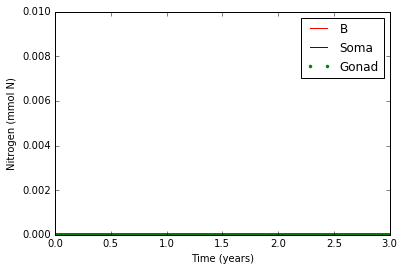

--------------------


In [41]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<
    InitCond['Gonad'] = 0.0 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass # <<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    Soma = np.zeros((NoSTEPS,),float) # <<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    Gonad = np.zeros((NoSTEPS,),float) # <<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] # <<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    Gonad[0] = InitCond['Gonad'] # <<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    B[0] = InitCond['Soma'] + InitCond['Gonad'] # <<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        dBdt = 0 # TO DO Eq.1 # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        dSomadt = 0  # TO DO Eq.11 # <<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        dGonaddt = 0 # TO DO Eq.12 # <<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) # <<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) # <<<<<<<<< NEW LINE !!!!! <<<<<<<<
        B[t+1] = Soma[t+1] + Gonad[t+1] # <<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    output['Soma'] = Soma # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    output['Gonad'] = Gonad # <<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') # <<<<<<<< NEW LINE !!!!! <<<<<<<<
    ax.plot(output['time']/365,output['Soma'],'b-') # <<<<< NEW LINE !!!!! <<<<<<<<
    ax.plot(output['time']/365,output['Gonad'],'g.') # <<<< NEW LINE !!!!! <<<<<<<<
    ax.legend(['B', 'Soma', 'Gonad']) # <<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    ax.set_ylabel('Nitrogen (mmol N)') # <<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    ax.set_xlabel('Time (years)') # <<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    plt.show()                      
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

If your code worked, you should have a plot where all `B`, `Soma` and `Gonad` are zero throughout the model run.

Lets do an inspection of the output.

<div class="c2c"></div>

In [42]:
type(output)

dict

<div class="Q"><br>

What type of object is <b>output</b>?

<br><br><div class="qhelp"></div></div>

Lets see what **keys** are in the `output` dictionary:

<div class="c2c"></div>

In [43]:
output.keys()

['Soma', 'Gonad', 'B', 'time']

<div class="Q"><br>

How many arrays (i.e. columns) are in the <b>output</b> dictionary... and what are the <b>keys</b> to call those arrays?

<br><br><div class="qhelp"></div></div>

Lets take a look at the last few values of the `time` array within the `output` dictionary:

<div class="c2c"></div>

In [44]:
output['time'][-10:]

array([ 1094.90999918,  1094.91999927,  1094.92999936,  1094.93999945,
        1094.94999954,  1094.95999963,  1094.96999973,  1094.97999982,
        1094.98999991,  1095.        ])

<div class="Q"><br>

What is the last value of the <b>time</b> array inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>


-------------

## Biomass (B)... continuation Eq.2

For the next "chunk", we will code the right-hand side of Eq.2.

(2) $$ \frac{\partial B}{\partial t} = (A - R) - Spawning$$

First in `#MAIN MODEL LOOP` we'll replace `dBdt = 0` for `dBdt = (A - R) - Spawning # Eq.2`. Note that we have not yet specified what is `A`, `R` or `Spawning`, there fore we'll add them ABOVE as zeros (see below).

    A = 0 # TO DO 
    R = 0 # TO DO 
    Spawning = 0 # TO DO
    dBdt = (A - R) - Spawning # Eq.2
    
Take a look below if you want to see the entire code with new lines included. Add the new lines to <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


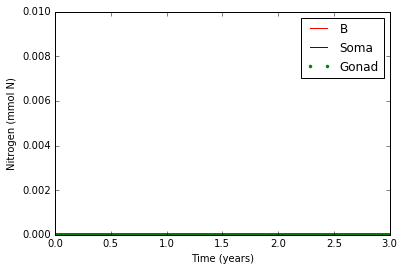

--------------------


In [45]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0 
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        A = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        R = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        Spawning = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        dBdt = (A - R) - Spawning # Eq.2 # <<<<<<<<<<<<<<<< CHANGED  !!!!! <<<<<<<<
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()                     
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

IF everything worked ok, you should see the plot with zeros (and not an error message). Remember that the actual model won't work until we finished coding the whole model.

The `load_defaults` function makes a `par` dictionary containing the parameters that we stored there so far. Lets inspect `par`:

<div class="c2c"></div>

In [46]:
par

{}

<div class="Q"><br>

What is inside the <b>par</b> dictionary?

<br><br><div class="qhelp"></div></div>

The `load_defaults` function also makes a `InitCond` dictionary containing the "Initial Conditions" that we stored there so far. Lets inspect `InitCond`:

<div class="c2c"></div>

In [47]:
InitCond

{'Gonad': 0.0, 'Soma': 0.01}

<div class="Q"><br>

What is inside the <b>InitCond</b> dictionary?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of Initial Condition for <b>Soma</b> inside the <b>InitCond</b> dictionary?

<br><br><div class="qhelp"></div></div>

----------------

## Assimilation (A) - Eq.3

In the next chunk we'll add Eq. 3. 

(3) $$ A = F \cdot [(\epsilon_P \cdot AE_P \cdot Phy)+(\epsilon_Z \cdot AE_Z \cdot Zoo)+(\epsilon_D \cdot AE_D \cdot SDet)]$$


Note that there are 3 variables ( `Phy`, `Zoo` and `SDet` ) whose values are estimated by the Plankton sub-model, but here we won't code that part. Instead, the values of `Phy`, `Zoo` and `SDet` will remain constant throughout the whole model run. The easiest way to do this is to insert this values as **Initial Conditions** (i.e. `InitCond['Phy']`, `InitCond['Zoo']`, and `InitCond['SDet']`). This is why you'll these initial conditon in the `A` equation below.

In the `#MAIN MODEL LOOK`, ad the following (Note that if your line is too long, you can break it up using the back-slash character, `\``, and then continuing in the following line):

    # Eq.3 
    A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                (par['epsilonD']*par['AE_D']*InitCond['SDet']))
                
Take a look at each terms of the right-hand side of the equation. None of the variables (e.g. `F`), parameters (e.g. `par['AE_P']`) or initial conditions (e.g. `InitCond['Phy'])`) actually exist. Therefore we have to add them before the model works again. Lets test this... once you inserted the snippet above to your code, <span class='run'></span> your code. It won't work, but take a look at the error message.

<div class="codeerror">NameError: global name 'F' is not defined</div>  

`F` is a new variable that we have not defined yet. We need to code the equation to calculate it, but for now lets just write a place holder (make sure to ad it BEFORE the equation for `A`)

    F = 0 # TO DO
    
After you inserted the snippet above, <span class='run'></span> your code. Again, it won't work, but it should give you a different error message.

<div class="codeerror">KeyError: 'epsilonP'</div>

This error says that Python cannot find the key `epsilonP`. If you look at your code for the `A` equation, the key `epsilonP` is used in `par['epsilonP']`. Python was able to find the `par` dictionary just fine, but it could not find inside `par` the key `epsilonP`. This is not surprising because we have not made `par['epsilonP']` yet... lets make it along with all the other parameters used in the `A` equation.

Add them to the `#Parameters` section:

    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2   
    par['AE_Z']  = 0.3 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3 

After you inserted the snippet above, <span class='run'></span> your code. Again, it won't work, but it should give you a different error message.

<div class="codeerror">KeyError: 'Phy'</div>

Python can't find the key `'Phy'`. which is used in `InitCond['Phy']`. Again, this is not surprising because we have not made any of the 3 new required Initial conditions yet...  lets add them to the `# Initial conditions` section:

    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    
Add the new lines to <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


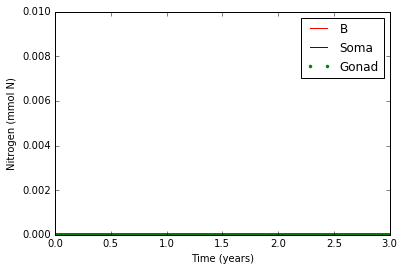

--------------------


In [48]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['AE_D']  = 0.2  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<  
    par['AE_Z']  = 0.3  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['epsilonP'] = 1. # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['epsilonD'] = 0.5 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['epsilonZ'] = 0.3 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    InitCond['Zoo'] = 0.3 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    InitCond['SDet'] = 0.2 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        F = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<

        # Eq.3 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  THIS CHANGED  !!!!! <<<<<<<<
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

You should see the plot with zeros (and not an error message). Remember that the actual model won't work until we finished coding the whole model.

Lets take a loot at the `par` again:

<div class="c2c"></div>

In [49]:
par

{'AE_D': 0.2,
 'AE_P': 0.9,
 'AE_Z': 0.3,
 'epsilonD': 0.5,
 'epsilonP': 1.0,
 'epsilonZ': 0.3}

<div class="Q"><br>

What is inside the <b>par</b> dictionary this time around?

<br><br><div class="qhelp"></div></div>

Lets inspect `InitCond` again:

<div class="c2c"></div>

In [50]:
InitCond

{'Gonad': 0.0, 'Phy': 0.8, 'SDet': 0.2, 'Soma': 0.01, 'Zoo': 0.3}

<div class="Q"><br>

How many elements are in the <b>InitCond</b> dictionary?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of Initial Condition for <b>Zoo</b> inside the <b>InitCond</b> dictionary?

<br><br><div class="qhelp"></div></div>

-------------

## Filtration rate (F) - Eq.4

(4) $$ F = F^{max} \cdot f(Temp) \cdot f(Salt) \cdot f(Oxy) \cdot f(Food)$$

Now, in `#MAIN MODEL LOOP` replace the place-holder `F = 0` with the following:

    F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 
    
In the right-hand side of the equation there are a bunch of new terms. For now we'll insert them as place-holders (see the `<<<<<<<< NEW LINE !!!!! <<<` comments in the code below).

Add the new lines (including the place-holders shown below) to <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


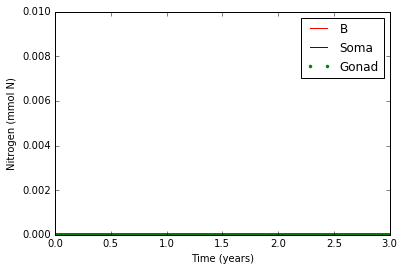

--------------------


In [51]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3 
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2 
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        L_Temp = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        L_Salt = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        L_Oxy = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        L_Food = 0 # TO DO # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 << NEW LINE !!!!! <<<<<<<<

        # Eq.3 # <<<<<<<<<<<<<< CHANGED  !!!!! (F instead of F) <<<<<<<<
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Did it worked?

---------------------

## Maximum filtration rate (Fmax) - Eq.5

(5)   $$ F^{max} = F^{max}_{ref} \cdot \left ( \frac{B}{B_{ref}} \right )^{2/3}$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation. Remember, we first add the code in the `#MAIN MODEL LOOP`, then above in the `load-defaults` function, and finally in the `plot` function (if required). 

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


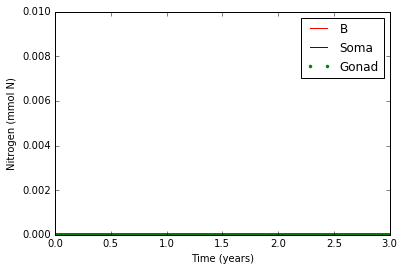

--------------------


In [52]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<  
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3 
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2 
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5 # <<< NEW LINE !!!!! <<<<<<<<  
        L_Temp = 0 # TO DO # 
        L_Salt = 0 # TO DO # 
        L_Oxy = 0 # TO DO # 
        L_Food = 0 # TO DO # 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Lets take a loot at the `par` again:

<div class="c2c"></div>

In [53]:
par

{'AE_D': 0.2,
 'AE_P': 0.9,
 'AE_Z': 0.3,
 'Fmax_ref': 0.025,
 'epsilonD': 0.5,
 'epsilonP': 1.0,
 'epsilonZ': 0.3}

<div class="Q"><br>

How many elements are inside the <b>par</b> dictionary this time around?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Which was the element last added to the <b>par</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Temperature limitation (L_Temp) - Eq.6

(6)
$$ f(Temp) = MIN 
\begin{cases}
MAX \left \{ 0,1-exp \left [-K^L_{Temp} \cdot (Temp - Temp_L) \right ] \right \}\\\
MAX \left \{ 0, 1+ \left ( \frac{1-exp(K^H_{Temp} \cdot Temp)}
{exp(K^H_{Temp} \cdot Temp_H)-1} \right ) \right \}
\end{cases}
$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


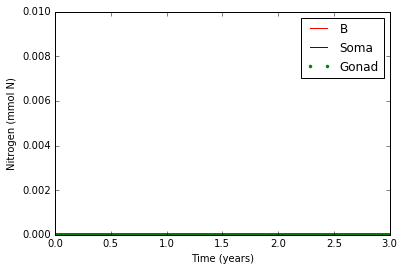

L_Temp = 0.846341805817
--------------------


In [54]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<    
    par['KTempL']= 0.5 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['TempH'] = 25. # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['TempL'] = -4. # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION !!!!! <<<<<<<< 
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        L_Salt = 0 # TO DO # 
        L_Oxy = 0 # TO DO # 
        L_Food = 0 # TO DO # 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))# <<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

There is a new "item" inside the `output` dictionary! Lets take a look:

<div class="c2c"></div>

In [55]:
output

{'B': array([ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01]),
 'Gonad': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'L_Temp': 0.846341805817443,
 'Soma': array([ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01]),
 'time': array([  0.00000000e+00,   1.00000913e-02,   2.00001827e-02, ...,
          1.09498000e+03,   1.09499000e+03,   1.09500000e+03])}

<div class="Q"><br>

What is the item that last added inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of <b>L_Temp</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

Note that the value of `L_Temp` is overwritten every time-step. Therefore the value of `output['L_Temp']` is the value of `L_Temp`at the very last time-step.

---------------------

## Salinity limitation (L_Salt) - Eq.7

(7)
$$ f(Salt) = MAX \left \{ 0,1-exp \left [-K^L_{Salt} \cdot (Salt - Salt_L) \right ] \right \}
$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


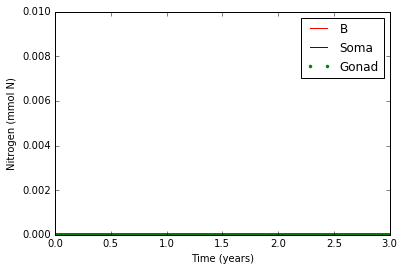

L_Temp = 0.846341805817
L_Salt = 0.993262053001
--------------------


In [56]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['SaltL'] = 10. # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION !!!!! <<<<<<<<
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        L_Oxy = 0 # TO DO # 
        L_Food = 0 # TO DO # 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<

    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))# <<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

<div class="Q"><br>

What is the value of <b>L_Salt</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Oxygen limitation (L_Oxy) - Eq.8

(8)
$$ f(Oxy) = MAX \left \{ 0,1-exp \left [-K^L_{Oxy} \cdot (Oxy - Oxy_L) \right ] \right \}
$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


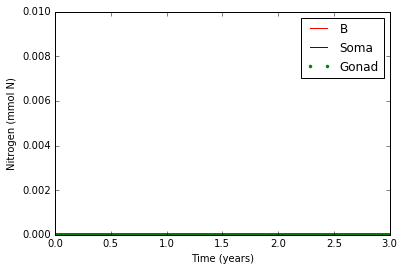

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
--------------------


In [57]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['KOxyL'] = 0.02 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340. # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<< 
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION !!!!! <<<<<<<<
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        L_Food = 0 # TO DO # 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy # <<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))# <<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

<div class="Q"><br>

What is the value of <b>L_Oxy</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Food limitation (L_Food) - Eq.9

(9) $$
f(Food) = \frac{Phy+Zoo+SDet}
{K_{Food}+Phy+Zoo+SDet}
$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


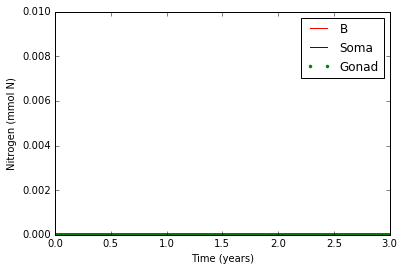

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304
--------------------


In [58]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 
    par['KOxyL'] = 0.02
    par['KFood'] = 1.  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340. # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<< 
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        
         # Eq.9 - Food Limitation # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION !!!!! <<<<<<<<
        L_Food = (InitCond['Phy']+InitCond['Zoo']+InitCond['SDet'])/ \
                 (par['KFood']+InitCond['Phy']+InitCond['Zoo']+InitCond['SDet']) 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        R = 0 # TO DO 
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food # <<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))
    print('L_Food  = ' + str(output['L_Food']))# <<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

<div class="Q"><br>

What is the value of <b>L_Food</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Respiration (R) - Eq.10

(10) $$
R = (R_m \cdot B)+(\beta \cdot A)
$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


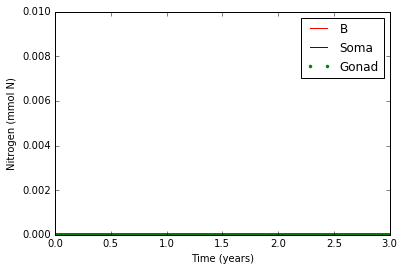

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304
--------------------


In [59]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 
    par['KOxyL'] = 0.02
    par['KFood'] = 1.  
    par['Rm']    = 0.002 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['beta']  = 0.12 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340.
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        
         # Eq.9 - Food Limitation
        L_Food = (InitCond['Phy']+InitCond['Zoo']+InitCond['SDet'])/ \
                 (par['KFood']+InitCond['Phy']+InitCond['Zoo']+InitCond['SDet']) 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        
        R = (par['Rm']*B[t]) + (par['beta']*A) # Eq.10 <<<< NEW LINE !!!!! <<<<<<<<
        
        
        
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2
        dSomadt = 0  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))
    print('L_Food  = ' + str(output['L_Food']))
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Lets take a loot at the `par` again:

<div class="c2c"></div>

In [60]:
par

{'AE_D': 0.2,
 'AE_P': 0.9,
 'AE_Z': 0.3,
 'Fmax_ref': 0.025,
 'KFood': 1.0,
 'KOxyL': 0.02,
 'KSaltL': 0.25,
 'KTempH': 0.1,
 'KTempL': 0.5,
 'OxyL': 17.5,
 'Rm': 0.002,
 'SaltL': 10.0,
 'TempH': 25.0,
 'TempL': -4.0,
 'beta': 0.12,
 'epsilonD': 0.5,
 'epsilonP': 1.0,
 'epsilonZ': 0.3}

<div class="Q"><br>

How many elements are inside the <b>par</b> dictionary now?

<br><br><div class="qhelp"></div></div>

Lets inspect `InitCond` again:

<div class="c2c"></div>

In [61]:
InitCond

{'Gonad': 0.0,
 'Oxy': 340.0,
 'Phy': 0.8,
 'SDet': 0.2,
 'Salt': 30,
 'Soma': 0.01,
 'Temp': 10,
 'Zoo': 0.3}

<div class="Q"><br>

How many elements are inside the <b>InitCond</b> dictionary now?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of Initial Condition for <b>Temp</b> inside the <b>InitCond</b> dictionary?

<br><br><div class="qhelp"></div></div>

Lets inspect `Soma`:

<div class="c2c"></div>

In [62]:
output['Soma'][-10:]

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01])

<div class="Q"><br>

What is the value of the last 10 elements of <b>Soma</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Soma - Eq.11

(11) $$ \frac{\partial Soma}{\partial t} = (A - R) \cdot (1 -RE)$$


Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


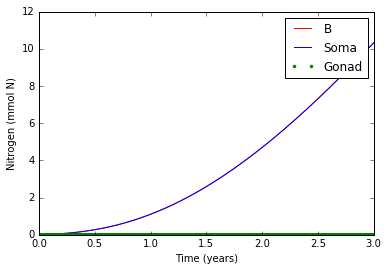

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304
--------------------


In [63]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 
    par['KOxyL'] = 0.02
    par['KFood'] = 1.  
    par['Rm']    = 0.002 
    par['beta']  = 0.12
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340.
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        
         # Eq.9 - Food Limitation
        L_Food = (InitCond['Phy']+InitCond['Zoo']+InitCond['SDet'])/ \
                 (par['KFood']+InitCond['Phy']+InitCond['Zoo']+InitCond['SDet']) 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        
        R = (par['Rm']*B[t]) + (par['beta']*A)
        
        RE = 0 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
        
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = (A-R) * (1.-RE) # Eq. 11 <<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<  
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))
    print('L_Food  = ' + str(output['L_Food']))
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Lets inspect `Soma`:

<div class="c2c"></div>

In [64]:
output['Soma'][-10:]

array([ 10.32198035,  10.3221534 ,  10.32232645,  10.3224995 ,
        10.32267255,  10.3228456 ,  10.32301866,  10.32319171,
        10.32336476,  10.32353782])

<div class="Q"><br>

What are the values of the last 10 elements of <b>Soma</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Dynamic Mass Allocation (RE) - Eq.13

(13) $$ RE=MAX \left ( 0, \frac{B-B_{Pub}}{K_{RE}+B-(2 \cdot B_{Pub})}\right)$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


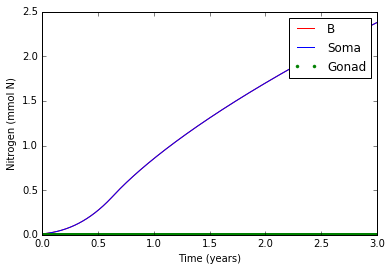

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304
--------------------


In [65]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 
    par['KOxyL'] = 0.02
    par['KFood'] = 1.  
    par['Rm']    = 0.002 
    par['beta']  = 0.12
    par['Bpub']    = 0.43 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    par['KRE']   = 0.86 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340.
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        
         # Eq.9 - Food Limitation
        L_Food = (InitCond['Phy']+InitCond['Zoo']+InitCond['SDet'])/ \
                 (par['KFood']+InitCond['Phy']+InitCond['Zoo']+InitCond['SDet']) 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        
        R = (par['Rm']*B[t]) + (par['beta']*A)
        
        # Dynamic mass allocation - Eq. 13 <<<<<<<<<<<<<< NEW SECTION <<<<<<<<<<<<<
        RE = max(0., (B[t]-par['Bpub'])/(par['KRE'] + B[t] - (2.*par['Bpub']))) 
        
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = (A-R) * (1.-RE) # Eq. 11 
        dGonaddt = 0 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))
    print('L_Food  = ' + str(output['L_Food']))
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Lets inspect `Gonad`:

<div class="c2c"></div>

In [66]:
output['Gonad'][-10:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

<div class="Q"><br>

What is the value of the last 10 elements of <b>Gonad</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Gonad - Eq.12


(12) $$ \frac{\partial Gonad}{\partial t} = \left [(A - R) \cdot RE \right ]-Spawning$$

Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span>

<span class="checkpoint">CHECKPOINT below...</span> 

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!


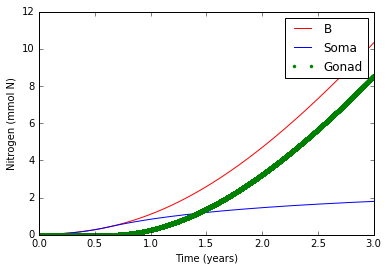

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304
--------------------


In [67]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 
    par['KOxyL'] = 0.02
    par['KFood'] = 1.  
    par['Rm']    = 0.002 
    par['beta']  = 0.12
    par['Bpub']    = 0.43
    par['KRE']   = 0.86
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340.
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        
         # Eq.9 - Food Limitation
        L_Food = (InitCond['Phy']+InitCond['Zoo']+InitCond['SDet'])/ \
                 (par['KFood']+InitCond['Phy']+InitCond['Zoo']+InitCond['SDet']) 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        
        R = (par['Rm']*B[t]) + (par['beta']*A)
        
        # Dynamic mass allocation - Eq. 13 
        RE = max(0., (B[t]-par['Bpub'])/(par['KRE'] + B[t] - (2.*par['Bpub']))) 
        
        Spawning = 0 # TO DO 
        dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = (A-R) * (1.-RE) # Eq. 11
        
        # Note that I added a "max" function to prevent Gonad to go negative <<<<<<<<<<<<<< NEW SECTION <<<<<<<<<<<<<
        dGonaddt = max(0.,((A-R) * RE) - Spawning) #Eq 12. 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))
    print('L_Food  = ' + str(output['L_Food']))
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Lets inspect `Gonad`:

<div class="c2c"></div>

In [68]:
output['Gonad'][-10:]

array([ 8.52530367,  8.52546951,  8.52563535,  8.52580119,  8.52596704,
        8.52613288,  8.52629872,  8.52646457,  8.52663041,  8.52679626])

<div class="Q"><br>

What are the values of the last 10 elements of <b>Gonad</b> inside the <b>output</b> dictionary?

<br><br><div class="qhelp"></div></div>

---------------------

## Spawning - Eq.14

(14)

$$
Spawning =
\begin{cases}
0, & \text{if } \frac{Gonad(t)}{B(t)} <GT \\
Gonat(t), & \text{if } \frac{Gonad(t)}{B(t)} \ge GT
\end{cases}
$$


Lets see if you can make sense of the new lines (code below) without a detailed explanation.

Copy-paste the **new lines** in the code below to your own <span class='file'>model_SHELLE.py</span> and click <span class='run'></span> 

<span class="checkpoint">CHECKPOINT below...</span> 

In [1]:
def load_defaults():
    print('Loading defaults...')
    # Framework
    days = 365 * 3 # One year
    dt   = 0.01 # units: days    
    
    # Parameters
    par = {}
    par['AE_P']  = 0.9  
    par['AE_D']  = 0.2 
    par['AE_Z']  = 0.3
    par['Fmax_ref']= 0.025 
    par['epsilonP'] = 1. 
    par['epsilonD'] = 0.5 
    par['epsilonZ'] = 0.3
    par['KTempH']= 0.1  
    par['KTempL']= 0.5
    par['TempH'] = 25. 
    par['TempL'] = -4. 
    par['KSaltL']= 0.25 
    par['SaltL'] = 10.
    par['OxyL']  = 17.5 
    par['KOxyL'] = 0.02
    par['KFood'] = 1.  
    par['Rm']    = 0.002 
    par['beta']  = 0.12
    par['Bpub']    = 0.43
    par['KRE']   = 0.86
    par['GT']    = 0.44 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!!!! <<<<<<<<
    
    # Initial conditions
    InitCond = {}
    InitCond['Soma'] = 0.01 
    InitCond['Gonad'] = 0.0
    InitCond['Phy'] = 0.8 
    InitCond['Zoo'] = 0.3 
    InitCond['SDet'] = 0.2
    InitCond['Temp'] = 10 
    InitCond['Salt'] = 30 
    InitCond['Oxy'] = 340.
    return  days, dt, par, InitCond
    
def run(days, dt, par, InitCond):
    print('Running model...')
    # Import libraries
    import numpy as np
    
    # Setup the framework 
    NoSTEPS = int(days / dt) # Calculates the number of steps 
    time = np.linspace(0,days,NoSTEPS) # Makes vector array of equally spaced numbers 
    
    # Create arrays of zeros
    B = np.zeros((NoSTEPS,),float) # Biomass 
    Soma = np.zeros((NoSTEPS,),float) 
    Gonad = np.zeros((NoSTEPS,),float)
    
    # Initializing with initial conditions
    Soma[0] = InitCond['Soma'] 
    Gonad[0] = InitCond['Gonad'] 
    B[0] = InitCond['Soma'] + InitCond['Gonad'] 
    
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        
        Fmax = par['Fmax_ref']*(B[t]**(2./3.)) # Eq.5
        
        # Eq.6 - Temperature Limitation  
        L_Temp = min(max(0.,1.-np.exp(-par['KTempL']*(InitCond['Temp']-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*InitCond['Temp']))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Eq.7 - Salinity Limitation 
        L_Salt = max(0.,1.-np.exp(-par['KSaltL']*(InitCond['Salt']-par['SaltL'])))
        
        # Eq.8 - Oxygen Limitation
        L_Oxy = max(0.,1.-np.exp(-par['KOxyL']*(InitCond['Oxy']-par['OxyL'])))
        
         # Eq.9 - Food Limitation
        L_Food = (InitCond['Phy']+InitCond['Zoo']+InitCond['SDet'])/ \
                 (par['KFood']+InitCond['Phy']+InitCond['Zoo']+InitCond['SDet']) 
        
        F = Fmax * L_Temp * L_Salt * L_Oxy * L_Food #Eq 4 

        # Eq.3 # 
        A = F * ((par['epsilonP']*par['AE_P']*InitCond['Phy'])+ \
                    (par['epsilonZ']*par['AE_Z']*InitCond['Zoo'])+ \
                    (par['epsilonD']*par['AE_D']*InitCond['SDet']))
        
        R = (par['Rm']*B[t]) + (par['beta']*A)
        
        # Dynamic mass allocation - Eq. 13 
        RE = max(0., (B[t]-par['Bpub'])/(par['KRE'] + B[t] - (2.*par['Bpub']))) 
        
        
        # Spawning Eq. 14 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION <<<<<<<<<<<<<
        if Gonad[t]/B[t] < par['GT']:
            Spawning = 0.
        elif Gonad[t]/B[t] >= par['GT']:
            Spawning = Gonad[t]
            Gonad[t] = 0.
            
        
        #dBdt = (A - R) - Spawning # Eq.2 
        dSomadt = (A-R) * (1.-RE) # Eq. 11
        
        # Note that I added a "max" function to prevent Gonad to go negative 
        dGonaddt = max(0.,((A-R) * RE) - Spawning) #Eq 12. 
        
        # Update and step ------------------------------
        Soma[t+1] = Soma[t] + (dSomadt * dt) 
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt) 
        B[t+1] = Soma[t+1] + Gonad[t+1] 
        
    # end of main model LOOP*******************************************************
    # *****************************************************************************

    # Pack output into dictionary
    output = {}
    output['time'] = time
    output['B'] = B 
    output['Soma'] = Soma 
    output['Gonad'] = Gonad 
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 
    
    print "Model run: DONE!!!"
    return  output

def plot(output):
    import matplotlib.pyplot as plt 
    # Plotting                      
    fig, (ax) = plt.subplots(1,1)
    ax.plot(output['time']/365,output['B'],'r-') 
    ax.plot(output['time']/365,output['Soma'],'b-') 
    ax.plot(output['time']/365,output['Gonad'],'g.')
    ax.legend(['B', 'Soma', 'Gonad']) 
    ax.set_ylabel('Nitrogen (mmol N)') 
    ax.set_xlabel('Time (years)')
    plt.show()          
    print('L_Temp = ' + str(output['L_Temp']))
    print('L_Salt = ' + str(output['L_Salt']))
    print('L_Oxy  = ' + str(output['L_Oxy']))
    print('L_Food  = ' + str(output['L_Food']))
    return

if __name__ == "__main__":
    print('Executing my_module.py')
    print('--------------------')
    
    days, dt, par, InitCond = load_defaults()
    output = run(days, dt, par, InitCond)
    plot(output)
    
    print('--------------------')
    

Executing my_module.py
--------------------
Loading defaults...
Running model...
Model run: DONE!!!
L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304
--------------------


Take a look at the graph above, specifically at the green line. Every time our mussel spawns the green line changes to zero.

<div class="Q"><br>

How many times our mussel spawned between year 1 and year 2?

<br><br><div class="qhelp"></div></div>

---------------------

---------------------

---------------------

# Playing with our new model

Now it is time to actually use our newly coded model. But first make to sure you have indeed the latest code in your <span class='file'>model_SHELLE.py</span> file. If in doubt, copy-paste the contents of the last CHECKPOINT into <span class='file'>model_SHELLE.py</span> and click [save].

Make a new file, save it as <span class='file'>Playing_with_SHELLE.py</span>. Make sure it is in the working directory (i.e.  the same directory as <span class='file'>model_SHELLE.py</span>).

Copy-paste the following code in your new <span class='file'>Playing_with_SHELLE.py</span> file and click <span class='run'></span>.

************ RUN 1: Default scenario************
Loading defaults...
Running model...
Model run: DONE!!!


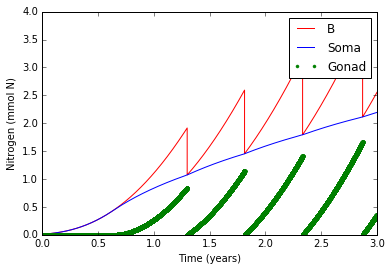

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.565217391304


In [5]:
import model_SHELLE as model

#%% Run 1

print('************ RUN 1: Default scenario************')

# load default parameters
days, dt, par, InitCond = model.load_defaults()

 # run the model
output = model.run(days, dt, par, InitCond)

# plot model
model.plot(output)

Lets see how big our mussel grew after 3 years by inspecting its `Soma` (note that don;t want to pay too much attention to total mussel biomass `B` because it changes depending on when our mussel spawned last).:

<div class="c2c"></div>

In [6]:
output['Soma'][-1]

2.1935157311930351

<div class="Q"><br>

What was the <b>Soma</b> of our mussel after growing for 3 years?

<br><br><div class="qhelp"></div></div>

The output is the result of the "default" run. Now lets run some "non-default" scenarios.



### Run 2: Low oxygen scenario

Copy-paste the code below at the bottom of the <span class='file'>Playing_with_SHELLE.py</span> file, select the last cell and click <span class='runcell'></span>.

************ Run 2: Low oxygen scenario ************
Loading defaults...
Running model...
Model run: DONE!!!


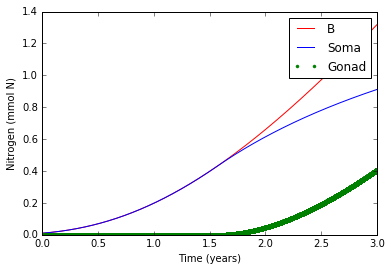

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.477954223239
L_Food  = 0.565217391304


In [7]:
#%% Run 2

print('************ Run 2: Low oxygen scenario ************')

# Re-load default parameters
days, dt, par, InitCond = model.load_defaults()

# Change a few things
InitCond['Oxy'] = 50. #Oxygen ...note that the default is 340

 # run the model
output = model.run(days, dt, par, InitCond)

# plot model
model.plot(output)

As you can see. First you loaded the defaults using `days, dt, par, InitCond = model.load_defaults()`, then you overwrote the default Initial Condition for Oxygen `InitCond['Oxy'] = 50`. Finally you ran the model with the new parameters (i.e. all defaults except for Oxygen). 

Lets inspecting `Soma` again:

In [8]:
output['Soma'][-1]

0.91173192118961977

<div class="Q"><br>

In the low oxygen scenario, what was the <b>Soma</b> of our mussel after growing for 3 years?

<br><br><div class="qhelp"></div></div>

### Run 3: Low phytoplankton scenario

Copy-paste the code below at the bottom of the <span class='file'>Playing_with_SHELLE.py</span> file, select the last cell and click <span class='runcell'></span>.

************ Run 3: Low phytoplankton scenario ************
Loading defaults...
Running model...
Model run: DONE!!!


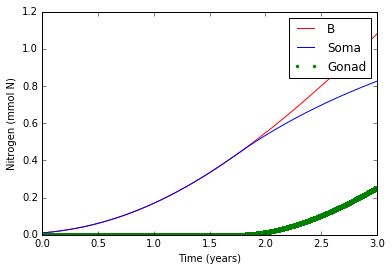

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.473684210526


In [9]:
#%% Run 3

print('************ Run 3: Low phytoplankton scenario ************')

# Re-load default parameters
days, dt, par, InitCond = model.load_defaults()

# Change a few things
InitCond['Phy'] = 0.4 #Phyto ...note that the default is 2

 # run the model
output = model.run(days, dt, par, InitCond)

# plot model
model.plot(output)

Lets inspecting `Soma` again:

In [10]:
output['Soma'][-1]

0.82598468570636874

<div class="Q"><br>

In the low phytoplankton scenario, what was the <b>Soma</b> of our mussel after growing for 3 years?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

In the low phytoplankton scenario, when did our mussel reached puberty?

Hint: When did the gonad started to grow?

<br><br><div class="qhelp"></div></div>


### Run 4: No food scenario

Copy-paste the code below at the bottom of the <span class='file'>Playing_with_SHELLE.py</span> file, select the last cell and click <span class='runcell'></span>.

************ Run 4: No food scenario ************
Loading defaults...
Running model...
Model run: DONE!!!


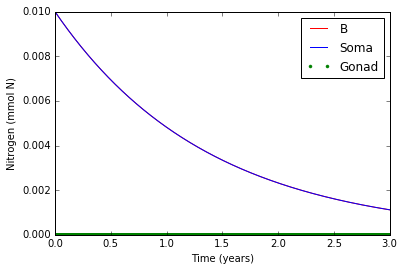

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.0


In [11]:
#%% Run 4

print('************ Run 4: No food scenario ************')

# Re-load default parameters
days, dt, par, InitCond = model.load_defaults()

# Change a few things
InitCond['Phy'] = 0. #Phyto ...note that the default is 2
InitCond['Zoo'] = 0. #Zoo
InitCond['SDet'] = 0. #SDet

 # run the model
output = model.run(days, dt, par, InitCond)

# plot model
model.plot(output)

<div class="Q"><br>

How did we setup the <b>Initial Conditions</b> to simulate the "no food" scenario?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

In the "no food" scenario, what happened to our mussel?

<br><br><div class="qhelp"></div></div>


### Run 5: Lots of phytoplankton

Copy-paste the code below at the bottom of the <span class='file'>Playing_with_SHELLE.py</span> file, select the last cell and click <span class='runcell'></span>.

************ Run 5: Lots of phytoplankton ************
Loading defaults...
Running model...
Model run: DONE!!!


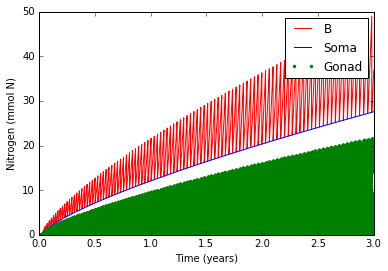

L_Temp = 0.846341805817
L_Salt = 0.993262053001
L_Oxy  = 0.998419477831
L_Food  = 0.913043478261


In [12]:
#%% Run 5

print('************ Run 5: Lots of phytoplankton ************')

# Re-load default parameters
days, dt, par, InitCond = model.load_defaults()

# Change a few things
InitCond['Phy'] = 10. #Phyto ...note that the default is 2

 # run the model
output = model.run(days, dt, par, InitCond)

# plot model
model.plot(output)

<div class="Q"><br>

In the "lots of phytoplankton" scenario, what happened to our mussel?

<br><br><div class="qhelp"></div></div>

### Run 6: What environmental variable has the largest impact?

Copy-paste the code below at the bottom of the <span class='file'>Playing_with_SHELLE.py</span> file, select the last cell and click <span class='runcell'></span>.

************ Run 6: What environmental variable has the largest impact? ************
Loading defaults...
Running model...
Model run: DONE!!!


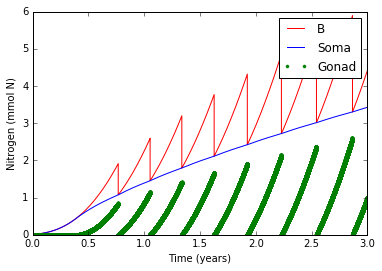

L_Temp = 0.956018335501
L_Salt = 0.632120558829
L_Oxy  = 0.807950091379
L_Food  = 0.69696969697


In [13]:
#%% Run 6

print('************ Run 6: What environmental variable has the largest impact? ************')

# Re-load default parameters
days, dt, par, InitCond = model.load_defaults()

# Change a few things
InitCond['Phy'] = 1.8 
InitCond['Temp'] = 4 
InitCond['Salt'] = 14 
InitCond['Oxy'] = 100.

 # run the model
output = model.run(days, dt, par, InitCond)

# plot model
model.plot(output)

Take a look at the model printout (just above), specifically at the values of `L_Temp`, `L_Salt`, `L_Oxy` and `L_Food` at the end of the model run. Then, answer the question below.

<div class="Q"><br>

What factor (i.e. Temperature, Salinity, Oxygen or Food) had the largest impact limiting the growth of our mussel?

<br><br><div class="qhelp"></div></div>


### MULTI-Run 7: Comparing different salinities

Copy-paste the code below at the bottom of the <span class='file'>Playing_with_SHELLE.py</span> file, select the last cell and click <span class='runcell'></span>.

************ MULTI-Run 7: Comparing different salinities ************
Loading defaults...
Running model...
Model run: DONE!!!
Running model...
Model run: DONE!!!
Running model...
Model run: DONE!!!
Running model...
Model run: DONE!!!
Running model...
Model run: DONE!!!
Running model...
Model run: DONE!!!


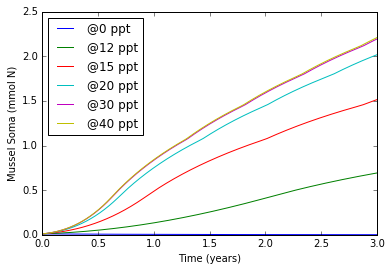

In [14]:
#%% Run 7

print('************ MULTI-Run 7: Comparing different salinities ************')

# Re-load default parameters
days, dt, par, InitCond = model.load_defaults()

# run1
InitCond['Salt'] = 0 
output_1 = model.run(days, dt, par, InitCond)

# run2
InitCond['Salt'] = 12 
output_2 = model.run(days, dt, par, InitCond)

# run3
InitCond['Salt'] = 15 
output_3 = model.run(days, dt, par, InitCond)

# run4
InitCond['Salt'] = 20 
output_4 = model.run(days, dt, par, InitCond)

# run5
InitCond['Salt'] = 30 
output_5 = model.run(days, dt, par, InitCond)

# run6
InitCond['Salt'] = 40 
output_6 = model.run(days, dt, par, InitCond)

# plot model
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1)
ax.plot(output_1['time']/365,output_1['Soma'],'-') 
ax.plot(output_2['time']/365,output_2['Soma'],'-') 
ax.plot(output_3['time']/365,output_3['Soma'],'-') 
ax.plot(output_4['time']/365,output_4['Soma'],'-') 
ax.plot(output_5['time']/365,output_5['Soma'],'-') 
ax.plot(output_6['time']/365,output_6['Soma'],'-')
ax.legend(['@0 ppt', '@12 ppt','@15 ppt','@20 ppt','@30 ppt','@40 ppt'], loc="upper left") 
ax.set_ylabel('Mussel Soma (mmol N)') 
ax.set_xlabel('Time (years)')
plt.show() 

<div class="Q"><br>

What happened to the mussel grown in freshwater (i.e. 0 ppt)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What salinity resulted in the fastest growth of mussels?

<br><br><div class="qhelp"></div></div>

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [15]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()